# 6.4 Supervised Machine Learning: Regression

#### Is there any correlation between the income of the customers with renewal behavior?
#### Is there a correlation between the number of unresolved complaints and customer loyalty?
#### Is there a relationship between the total claim amount and customer loyalty or response to renewal offers?

The correlation between dependent variables such as Total Claim Amount, Income, and Number of Unresolved Complaints, and the independent variable "customer lifetime variables" has already been examined using a choropleth map.
#### Hypothesis to test :Customers who opt for higher monthly premiums are more likely to stay with the organization,Customers with fewer complaints will remain in the long term.

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

## 01. Importing Libraries & Data 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Import Data
#Create path
path = r'C:\Users\Dell\Documents\IBM Watson Marketing Customer Value Data'


In [4]:
# import customer_value dataset
df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'customer_value_new.pkl'))

## 02. Data cleaning

In [5]:
df.columns

Index(['Customer Id', 'State', 'Customer Lifetime Value', 'Response',
       'Coverage', 'Policy Expiry Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
# Checking for missing values
df.isnull().sum()

Customer Id                      0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Policy Expiry Date               0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
# Finding duplicates
df_dups = df[df.duplicated()]

In [8]:
df_dups

,Customer Id,State,Customer Lifetime Value,Response,Coverage,Policy Expiry Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


C:\Users\DELL\AppData\Local\Temp\ipykernel_11112\2651510075.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Customer Lifetime Value'], bins=25) # Shows extreme values
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Customer Lifetime Value', ylabel='Density'>

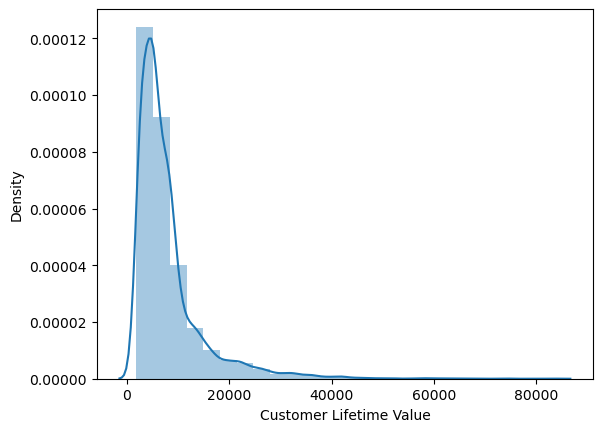

In [9]:
# Cheking for outliers
sns.distplot(df['Customer Lifetime Value'], bins=25) # Shows extreme values

#### To address the challenges posed by outliers, I have opted the mean customer lifetime value (CLV) for my analysis.

## 03. Data prep for regression analysis

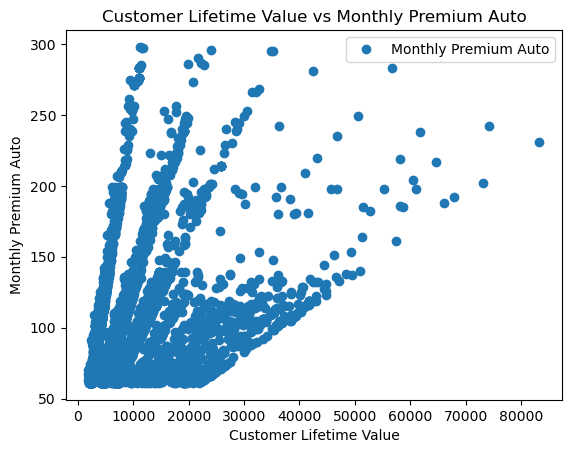

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Customer Lifetime Value', y='Monthly Premium Auto',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Customer Lifetime Value vs Monthly Premium Auto')  
plt.xlabel('Customer Lifetime Value')  
plt.ylabel('Monthly Premium Auto')  
plt.show()

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Customer Lifetime Value'].values.reshape(-1,1)
y = df['Monthly Premium Auto'].values.reshape(-1,1)

In [12]:
X

array([[ 2763.519279],
       [ 6979.535903],
       [12887.43165 ],
       ...,
       [ 8163.890428],
       [ 7524.442436],
       [ 2611.836866]])

In [13]:
y

array([[ 69],
       [ 94],
       [108],
       ...,
       [ 85],
       [ 96],
       [ 77]], dtype=int64)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [16]:
regression.fit(X_train, y_train)  # Fit the regression object onto the training set.

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 04. Regression Analysis

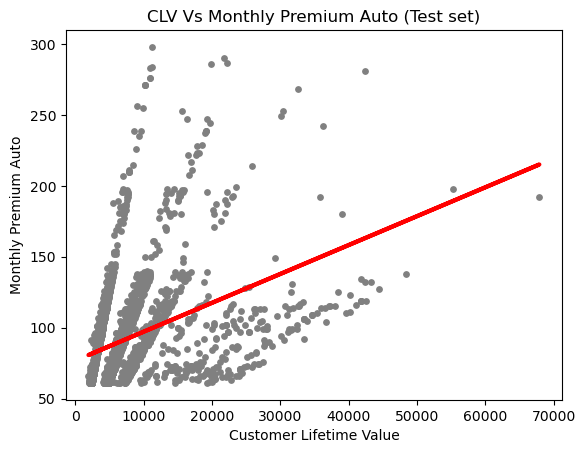

In [18]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('CLV Vs Monthly Premium Auto (Test set)')
plot_test.xlabel('Customer Lifetime Value')
plot_test.ylabel('Monthly Premium Auto')
plot_test.show()

In [19]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [20]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00203782]]
Mean squared error:  1009.4211746655195
R2 score:  0.1269424378793298


In [21]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,70,88.099759
1,68,81.425543
2,119,96.146029
3,239,94.190445
4,126,85.323163
5,116,85.473041
6,112,94.707808
7,94,84.399505
8,93,83.952617
9,88,89.035490


In [22]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [23]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [24]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00203782]]
Mean squared error:  993.2087425726169
R2 score:  0.16925271989507962


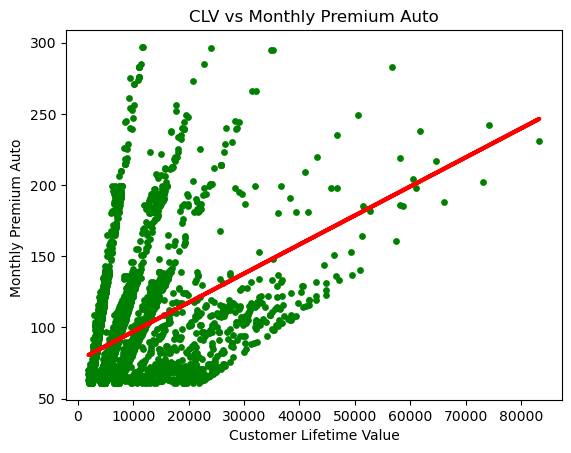

In [28]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('CLV vs Monthly Premium Auto')
plot_test.xlabel('Customer Lifetime Value')
plot_test.ylabel('Monthly Premium Auto ')
plot_test.show()

#### The regression model with these values indicates a small positive relationship between the variables. However, the majority of the variation in the dependent variable is not captured by this model. This suggests that there may be other significant factors that influence the dependent variable, which are not included in the modeled. It would be advisable to further investigate other variables that might better explain the dependent variable's variation or to consider a more complex model that could capture the underlying relationship more effectively.

## Linear Regression (By filtering with 'Number of Open Complaints')

In [29]:
df1 = df[df['Number of Open Complaints'].isin([0, 1])]
df1

,Customer Id,State,Customer Lifetime Value,Response,Coverage,Policy Expiry Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,02/03/2011,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,01/06/2011,Employed,F,47761,Suburban,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9129,LA72316,California,23405.987980,No,Basic,02/10/2011,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,02/12/2011,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,02/03/2011,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Data prep for regression analysis

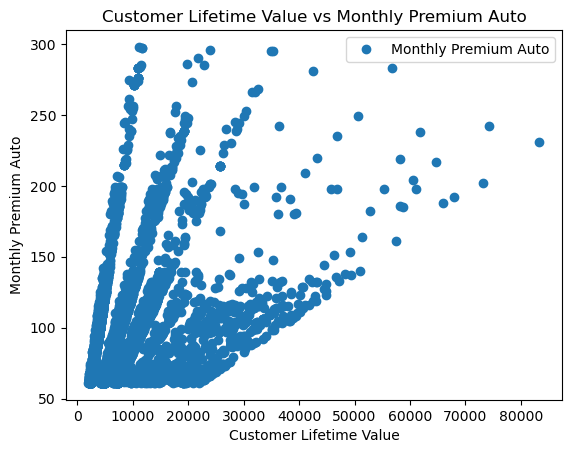

In [30]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df1.plot(x = 'Customer Lifetime Value', y='Monthly Premium Auto',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Customer Lifetime Value vs Monthly Premium Auto')  
plt.xlabel('Customer Lifetime Value')  
plt.ylabel('Monthly Premium Auto')  
plt.show()

In [31]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['Customer Lifetime Value'].values.reshape(-1,1)
y = df1['Monthly Premium Auto'].values.reshape(-1,1)

In [32]:
X

array([[ 2763.519279],
       [ 6979.535903],
       [12887.43165 ],
       ...,
       [ 3096.511217],
       [ 7524.442436],
       [ 2611.836866]])

In [33]:
y

array([[ 69],
       [ 94],
       [108],
       ...,
       [ 79],
       [ 96],
       [ 77]], dtype=int64)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
regression.fit(X_train, y_train)  # Fit the regression object onto the training set.

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## Regression Analysis

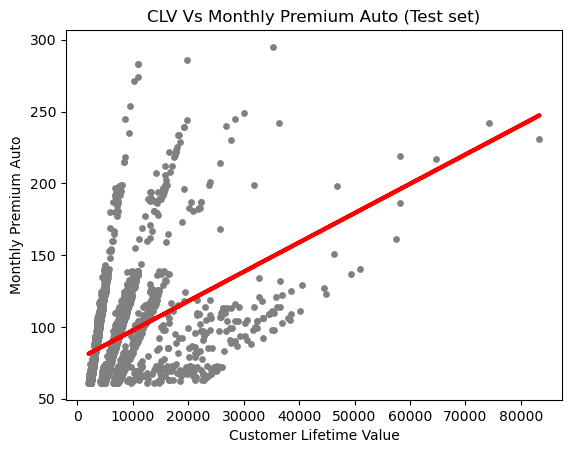

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('CLV Vs Monthly Premium Auto (Test set)')
plot_test.xlabel('Customer Lifetime Value')
plot_test.ylabel('Monthly Premium Auto')
plot_test.show()

In [38]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00204166]]
Mean squared error:  918.6334091084917
R2 score:  0.1610157893771944


In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,109,94.762072
1,117,86.662637
2,61,86.532579
3,69,88.470000
4,70,82.927152
5,67,88.200395
6,66,82.485159
7,108,94.725858
8,117,85.677343
9,70,82.920110


In [41]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00204166]]
Mean squared error:  1033.1130818852591
R2 score:  0.1604050286160119


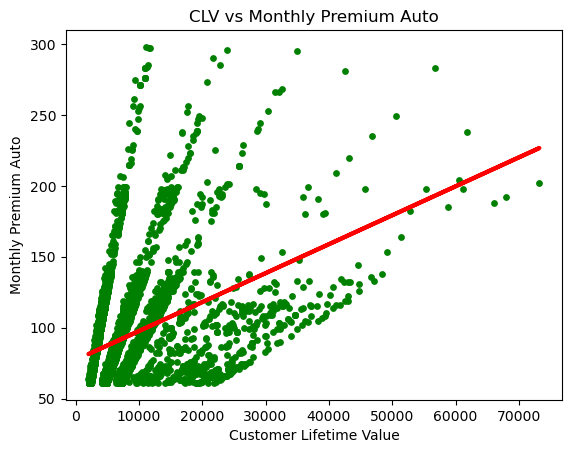

In [45]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('CLV vs Monthly Premium Auto')
plot_test.xlabel('Customer Lifetime Value')
plot_test.ylabel('Monthly Premium Auto')
plot_test.show()

#### The regression analysis conducted with these variables reveals a modest positive association among them, surpassing the performance of the model provided in the earlier example. Nevertheless, the majority of the variability observed in the dependent variable remains unaccounted for by this model. This also implies the existence of other significant factors influencing the dependent variable that haven't been incorporated into the model.

## 05. Bonus: performance improvement after removing outliers

In [46]:
df1.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8263.000000,8263.000000,8263.000000,8263.000000,8263.000000,8263.000000,8263.000000,8263.000000
mean,8071.365994,37605.701561,93.326153,15.091008,48.068619,0.122353,2.961031,434.807057
std,6916.048026,30333.731357,34.499899,10.048319,27.878341,0.327712,2.385947,290.629356
min,1994.774936,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4015.277263,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.789253
50%,5802.065978,33760.000000,83.000000,14.000000,48.000000,0.000000,2.000000,386.031248
75%,9048.051328,62243.500000,109.000000,23.000000,71.000000,0.000000,4.000000,551.207135
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,1.000000,9.000000,2759.794354


In [47]:
# Clean the extreme values from the "Customer Lifetime Value" variable observed during the consistency checks.

df_test = df1[df1['Customer Lifetime Value'] <=10000]

## Data prep for regression analysis

In [ ]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_test.plot(x = 'Customer Lifetime Value', y='Monthly Premium Auto',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Customer Lifetime Value vs Monthly Premium Auto')  
plt.xlabel('Customer Lifetime Value')  
plt.ylabel('Monthly Premium Auto')  
plt.show()

In [ ]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_test['Customer Lifetime Value'].values.reshape(-1,1)
y = df_test['Monthly Premium Auto'].values.reshape(-1,1)

In [ ]:
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
regression.fit(X_train, y_train)  # Fit the regression object onto the training set.

In [ ]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## Regression Analysis

In [ ]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('CLV Vs Monthly Premium Auto (Test set)')
plot_test.xlabel('Customer Lifetime Value')
plot_test.ylabel('Monthly Premium Auto')
plot_test.show()

In [ ]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [ ]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

In [ ]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

In [ ]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [ ]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [ ]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

In [ ]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('CLV vs Income (Train set)')
plot_test.xlabel('Customer Lifetime Value')
plot_test.ylabel('Income ')
plot_test.show()

#### Removing outliers appears to have led to a change in the regression results. The slope coefficient has increased, indicating a steeper relationship between the independent variable (Customer Lifetime Value) and the dependent variable. The mean squared error (MSE) has decreased, suggesting that the model's predictions are closer to the actual values compared to the previous model. However, the R-squared (R2) score has decreased slightly, indicating that the proportion of variance explained by the independent variable has decreased.
### Removing high CLV values may not always be advisable, especially if they represent legitimate data points that reflect the actual performance of your customers. Customer Lifetime Value (CLV) is indeed a crucial factor contributing to a company's success, and high CLV values could indicate valuable customer segments that are particularly profitable or loyal.
#### 
However, there may be cases where extreme CLV values are outliers that skew the analysis and distort the interpretation of the results. In such situations, it might be justified to remove these outliers after careful consideration and exploration of the da
#### Before removing high CLV values, it's essential to understand why they are considered outliers. Are they genuine representations of exceptionally profitable customers, or do they result from errors or anomalies in the data? Investigating the underlying reasons behind these high CLV values can provide insights into whether they should be retained or removed from the analysis. Additionally, alternative approaches, such as robust regression techniques or transformations, can sometimes mitigate the influence of outliers without discarding valuable information.ta

#### While the regression analysis provides initial support for the hypothesis, additional analysis is required to validate its authenticity.